In [3]:
from matplotlib.colors import LogNorm
import yt 
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ~/project/FLASH4.3_3/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_3/object


(start,end): 71 185
(start,end): 72 184
(start,end): 72 184
(start,end): 73 183
(start,end): 73 183
(start,end): 74 182
(start,end): 75 181
(start,end): 75 181
(start,end): 76 180
(start,end): 78 178
(start,end): 79 177
(start,end): 81 175
(start,end): 83 173
(start,end): 85 171
(start,end): 88 168
(start,end): 91 165
(start,end): 95 161
(start,end): 99 157
(start,end): 105 151
(start,end): 111 145


/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


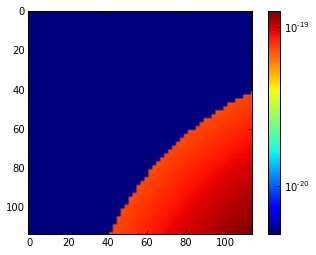

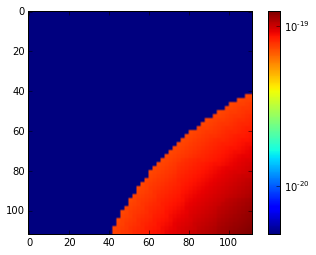

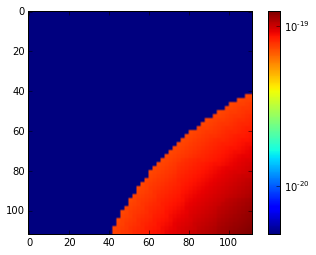

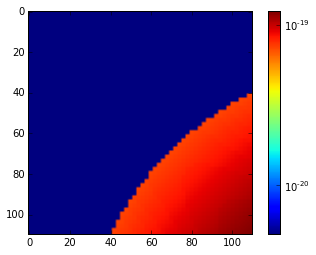

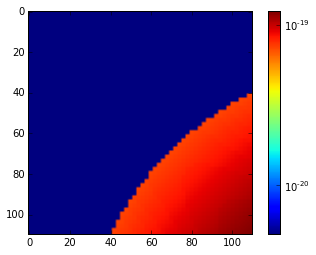

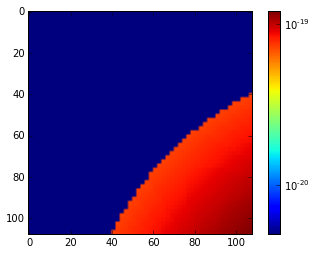

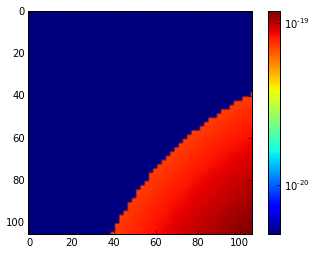

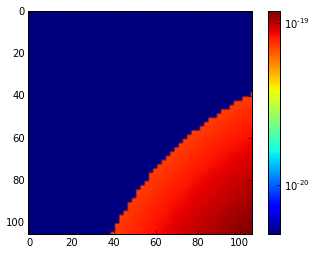

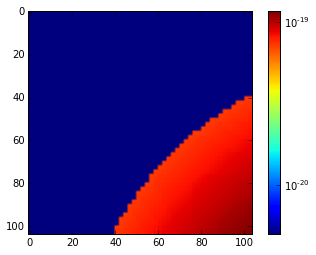

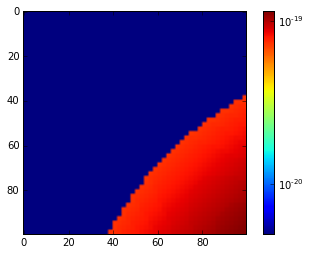

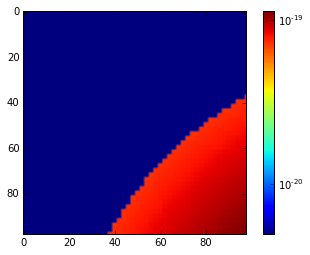

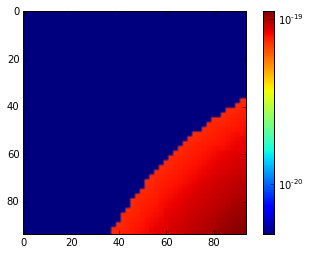

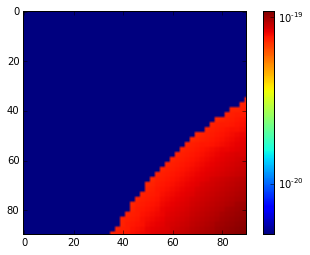

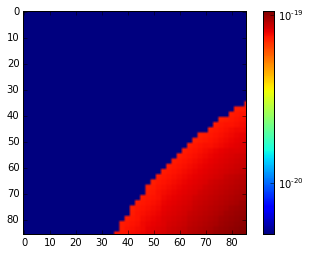

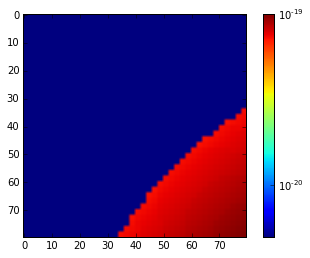

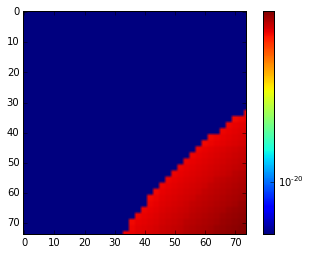

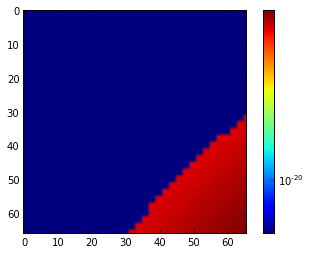

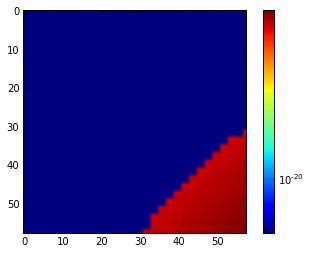

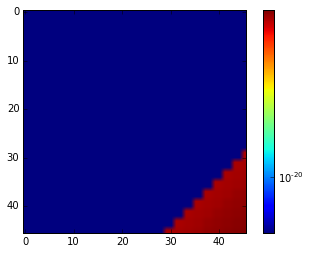

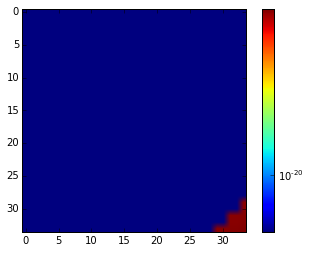

In [6]:
i =0 
boxlen=1.0e19
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])

cell_size = int((ds.domain_width/dim)[0].in_cgs())
ri = 1.5998e18

xi_range = np.logspace(-0.1,np.log10(17),num=20)
r_range = xi_range/1.057E-17


ratio = boxlen/dim
for ri in r_range:
    plt.figure()
    margin = [int(ri/ratio)+70 if int(ri/ratio)+70 <127 else 0][0]
    start  = margin
    end = dim-margin
    print "(start,end):",start,end
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()

In [3]:
i =0 
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
boxlen=int(ds.domain_width[0])

In [14]:
lev = 6
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0,0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])
cell_size = int((ds.domain_width/dim)[0].in_cgs())
ri = 1.5998e18

xi_range = np.logspace(-0.1,np.log10(17),num=20)
r_range = xi_range/1.057E-17


In [18]:
shape(dens_arr)

(512, 512, 512)

In [21]:
(start-end)**3

-8741816.0

/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


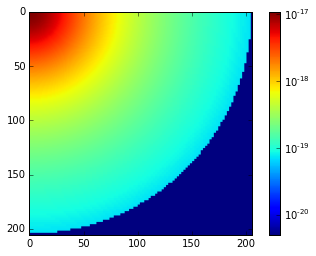

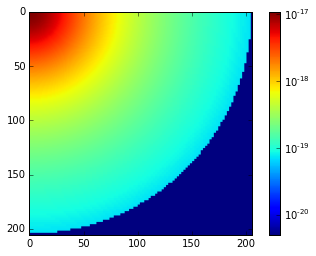

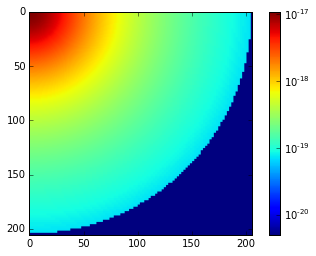

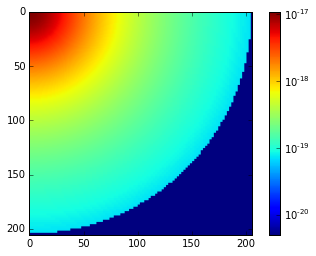

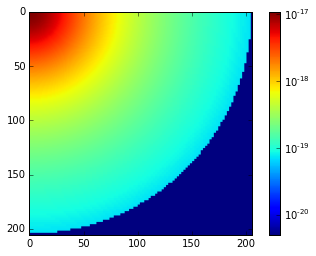

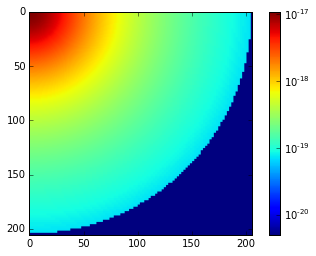

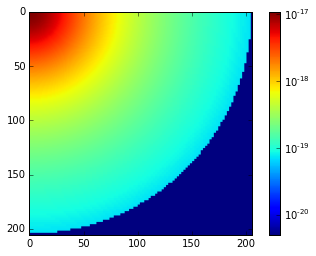

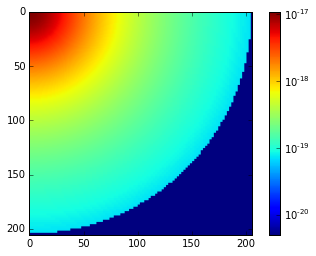

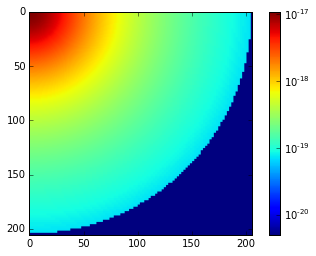

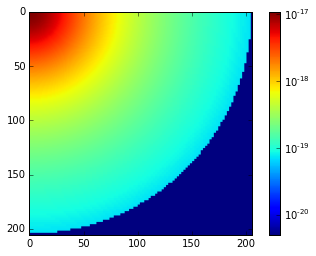

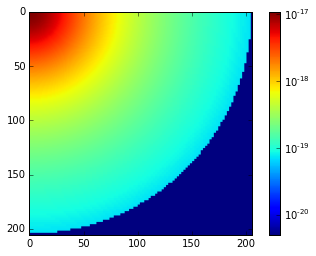

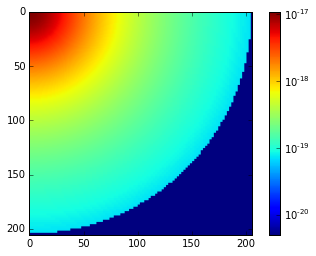

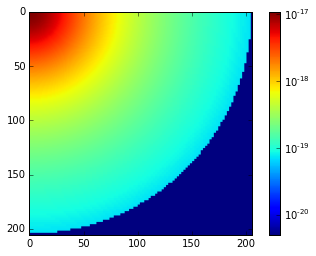

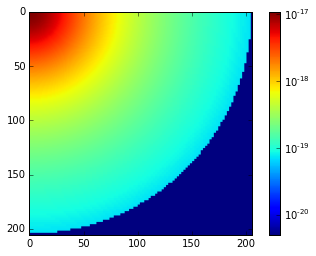

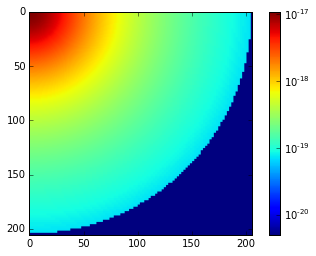

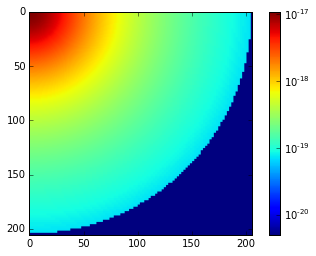

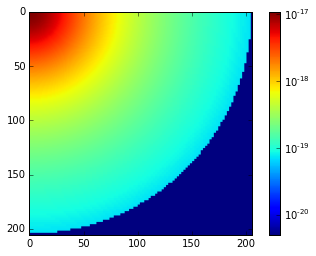

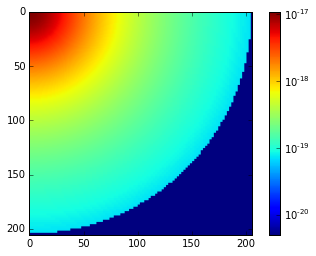

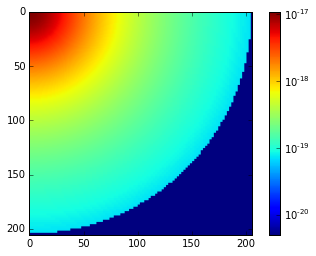

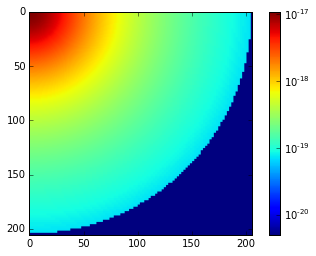

In [19]:
ratio = boxlen/dim
start  = dim/2.
end = dim-50
for ri in r_range:
    plt.figure()
#     print "(start,end):",start,end
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()

(start,end): 1 128
ri :  7.51493126513e+16
Looping over:  2048383
(start,end): 2 128
ri :  8.82975473156e+16
Looping over:  2000376
(start,end): 2 128
ri :  1.03746216524e+17
Looping over:  2000376
(start,end): 3 128
ri :  1.218978077e+17
Looping over:  1953125
(start,end): 3 128
ri :  1.4322522806e+17
Looping over:  1953125
(start,end): 4 128
ri :  1.68284125366e+17
Looping over:  1906624
(start,end): 5 128
ri :  1.97727364333e+17
Looping over:  1860867
(start,end): 5 128
ri :  2.32322035849e+17
Looping over:  1860867
(start,end): 6 128
ri :  2.72969442156e+17
Looping over:  1815848
(start,end): 8 128
ri :  3.20728578667e+17
Looping over:  1728000
(start,end): 9 128
ri :  3.76843724196e+17
Looping over:  1685159
(start,end): 11 128
ri :  4.42776858415e+17
Looping over:  1601613
(start,end): 13 128
ri :  5.20245751116e+17
Looping over:  1520875
(start,end): 15 128
ri :  6.1126871563e+17
Looping over:  1442897
(start,end): 18 128
ri :  7.18217192369e+17
Looping over:  1331000
(start,end

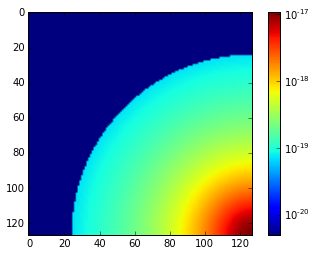

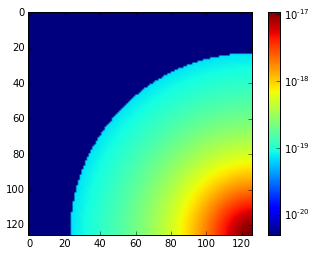

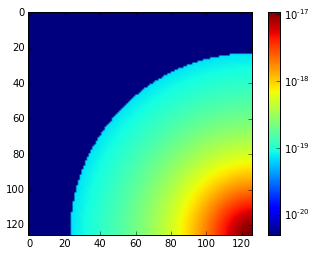

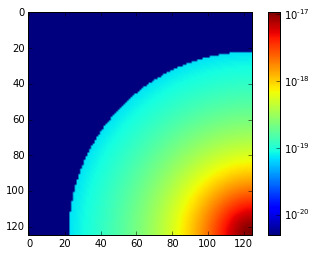

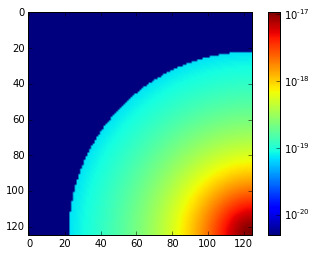

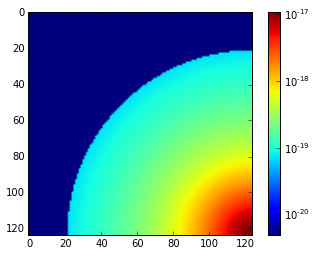

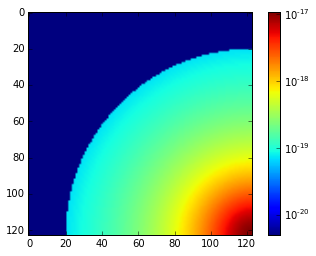

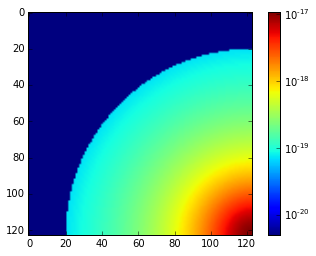

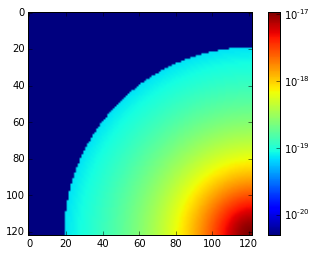

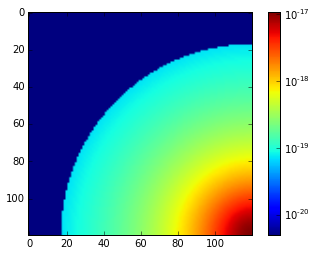

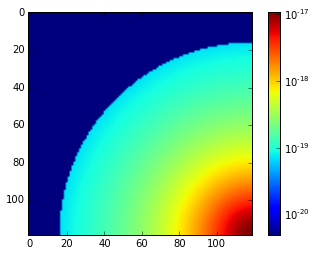

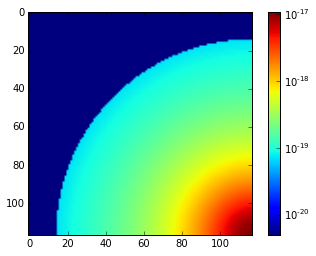

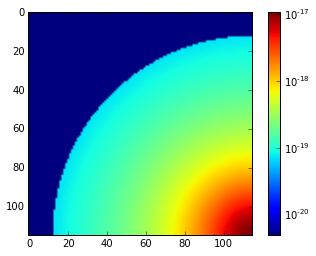

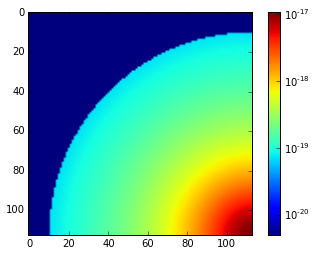

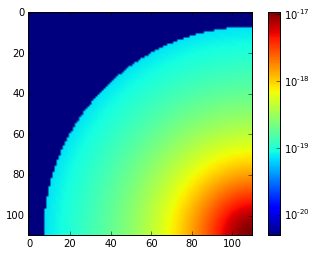

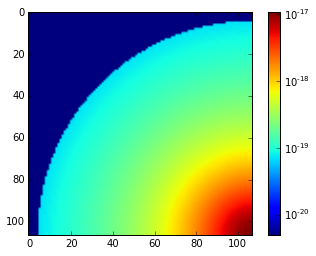

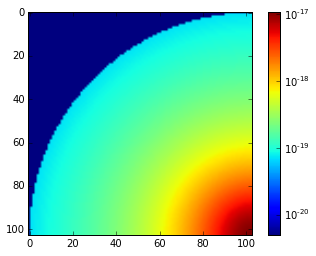

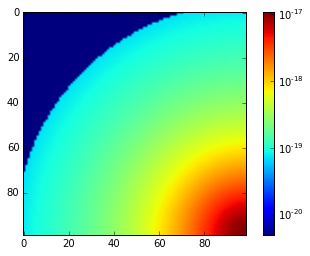

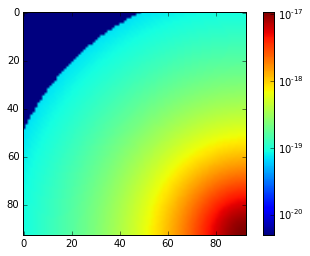

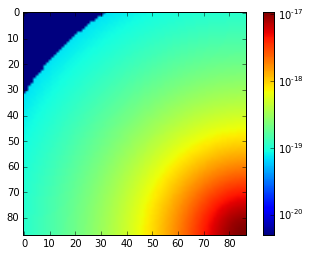

In [58]:
ratio = boxlen/dim
end  = dim/2
ctr =dim/2
dr = cell_size
num_cell_loop_over_lst = []
for ri in r_range:
    start = int(ri/ratio)
    plt.figure()
    print "(start,end):",start,end
    xyzrange = np.arange(start,end)
    print "ri : ",ri
    print "Looping over: ", len(xyzrange)**3
    num_cell_loop_over_lst.append(len(xyzrange)**3)
#     for i in xyzrange:
#         for j in xyzrange:
#             for k in xyzrange:
#                 r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
#                 if np.isclose(r,ri,atol=dr):#atol is +/-
#                     dens_arr[i][j][k]=1
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()
    

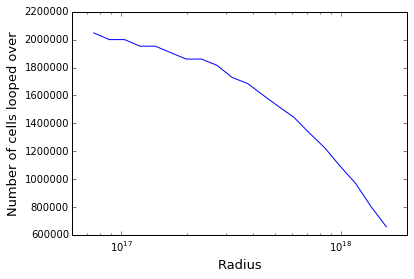

In [16]:
plt.semilogx(r_range,num_cell_loop_over_lst)
plt.xlim(6e16,2e18)
plt.ylabel("Number of cells looped over ",fontsize=13)
plt.xlabel("Radius ",fontsize=13)

(start,end): 2 127
ri :  7.51493126513e+16
Looping over:  1953125
(start,end): 4 126
ri :  8.82975473156e+16
Looping over:  1815848
(start,end): 4 126
ri :  1.03746216524e+17
Looping over:  1815848
(start,end): 6 125
ri :  1.218978077e+17
Looping over:  1685159
(start,end): 6 125
ri :  1.4322522806e+17
Looping over:  1685159
(start,end): 8 124
ri :  1.68284125366e+17
Looping over:  1560896
(start,end): 10 123
ri :  1.97727364333e+17
Looping over:  1442897
(start,end): 10 123
ri :  2.32322035849e+17
Looping over:  1442897
(start,end): 12 122
ri :  2.72969442156e+17
Looping over:  1331000
(start,end): 16 120
ri :  3.20728578667e+17
Looping over:  1124864
(start,end): 18 119
ri :  3.76843724196e+17
Looping over:  1030301
(start,end): 22 117
ri :  4.42776858415e+17
Looping over:  857375
(start,end): 26 115
ri :  5.20245751116e+17
Looping over:  704969
(start,end): 30 113
ri :  6.1126871563e+17
Looping over:  571787
(start,end): 36 110
ri :  7.18217192369e+17
Looping over:  405224
(start,en

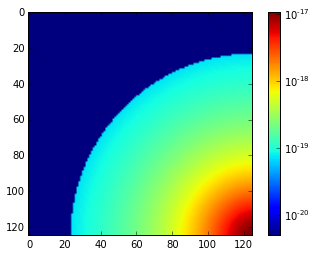

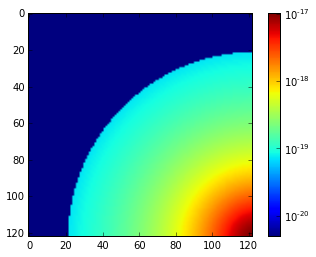

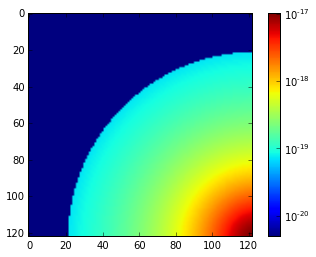

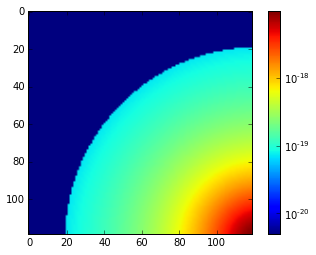

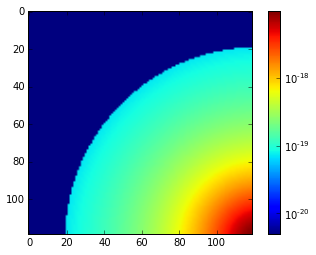

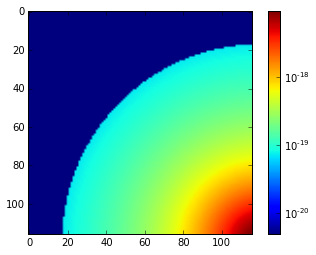

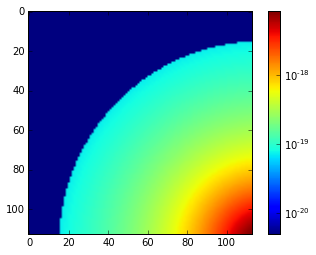

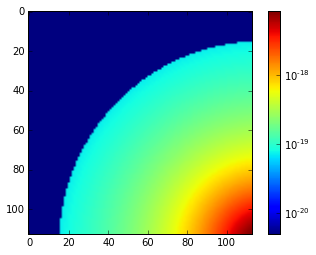

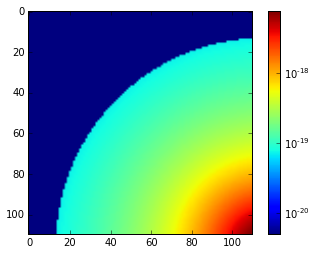

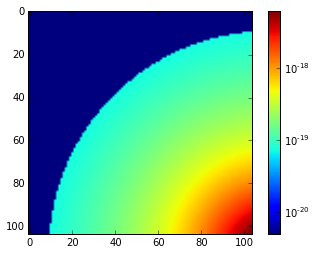

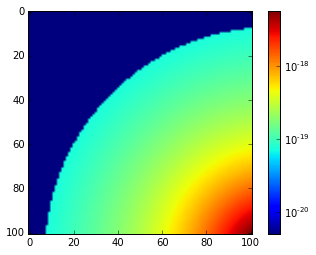

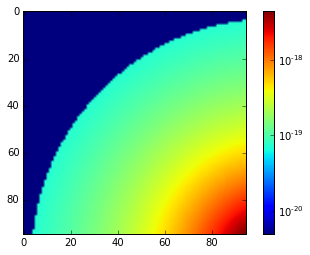

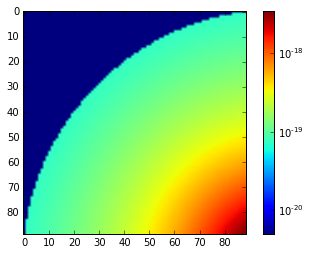

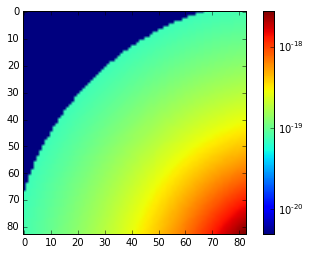

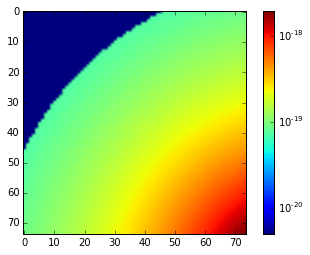

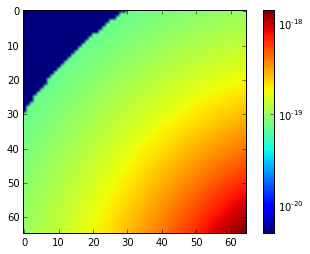

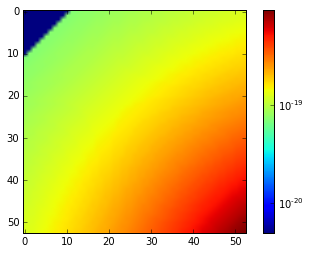

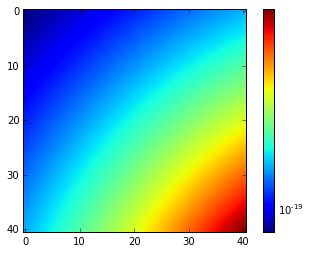

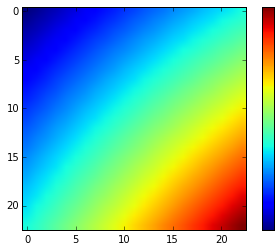

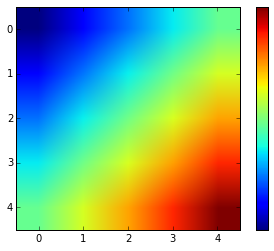

In [69]:
ratio = boxlen/dim
ctr =dim/2
dr = cell_size
num_cell_loop_over_lst2 = []
for ri in r_range:
    start = 2*int(ri/ratio)
    end  = dim/2-int(ri/ratio)
    plt.figure()
    print "(start,end):",start,end
    xyzrange = np.arange(start,end)
    print "ri : ",ri
    print "Looping over: ", len(xyzrange)**3
    num_cell_loop_over_lst2.append(len(xyzrange)**3)
#     for i in xyzrange:
#         for j in xyzrange:
#             for k in xyzrange:
#                 r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
#                 if np.isclose(r,ri,atol=dr):#atol is +/-
#                     dens_arr[i][j][k]=1
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()
    

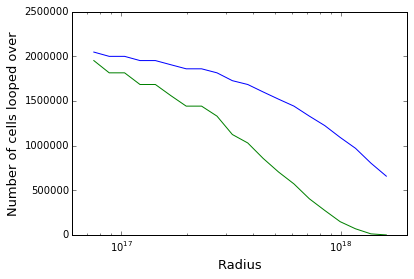

In [71]:
plt.semilogx(r_range,num_cell_loop_over_lst)
plt.semilogx(r_range,num_cell_loop_over_lst2)
plt.xlim(6e16,2e18)
plt.ylabel("Number of cells looped over ",fontsize=13)
plt.xlabel("Radius ",fontsize=13)

(start,end): 2 127
ri :  7.51493126513e+16
Looping over:  1953125
(start,end): 4 126
ri :  8.82975473156e+16
Looping over:  1815848
(start,end): 4 126
ri :  1.03746216524e+17
Looping over:  1815848
(start,end): 6 125
ri :  1.218978077e+17
Looping over:  1685159
(start,end): 6 125
ri :  1.4322522806e+17
Looping over:  1685159
(start,end): 8 124
ri :  1.68284125366e+17
Looping over:  1560896
(start,end): 10 123
ri :  1.97727364333e+17
Looping over:  1442897
(start,end): 10 123
ri :  2.32322035849e+17
Looping over:  1442897
(start,end): 12 122
ri :  2.72969442156e+17
Looping over:  1331000
(start,end): 16 120
ri :  3.20728578667e+17
Looping over:  1124864
(start,end): 18 119
ri :  3.76843724196e+17
Looping over:  1030301
(start,end): 22 117
ri :  4.42776858415e+17
Looping over:  857375
(start,end): 26 115
ri :  5.20245751116e+17
Looping over:  704969
(start,end): 30 113
ri :  6.1126871563e+17
Looping over:  571787
(start,end): 36 110
ri :  7.18217192369e+17
Looping over:  405224
(start,en

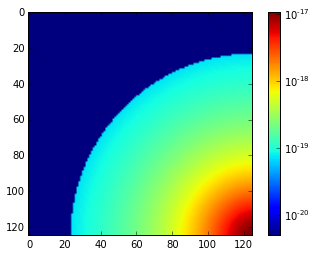

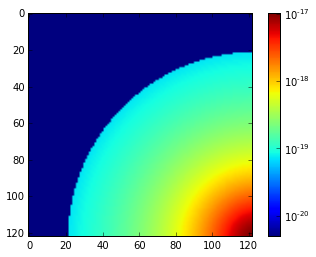

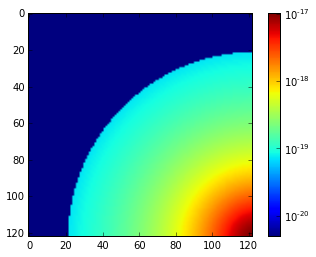

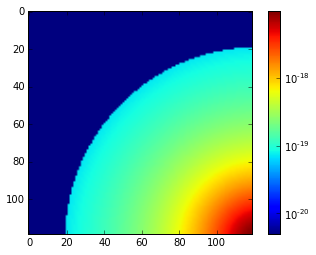

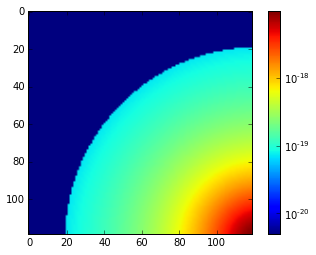

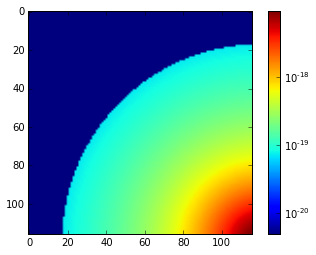

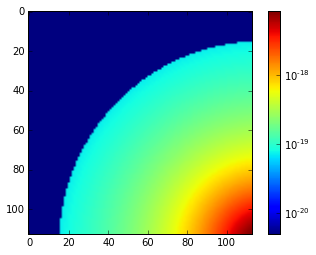

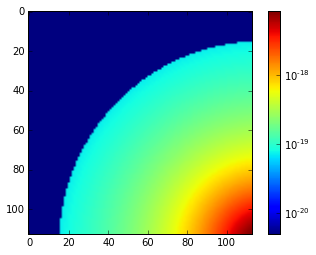

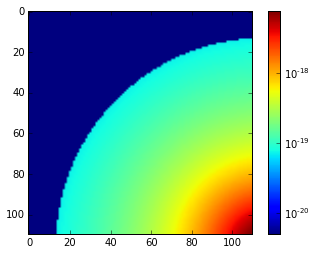

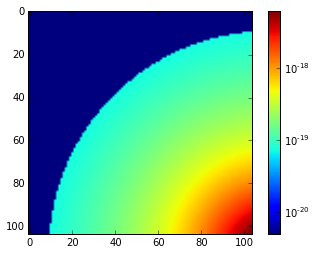

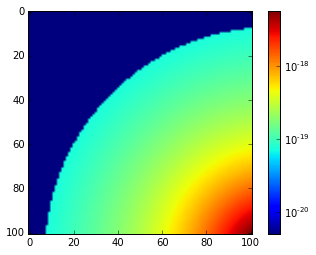

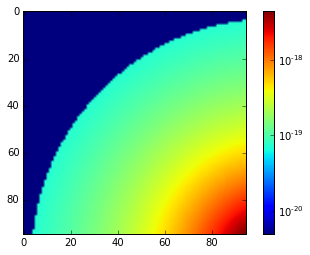

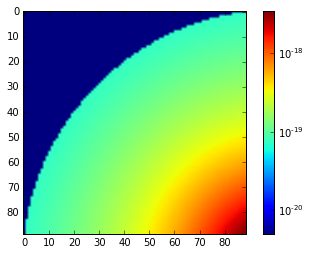

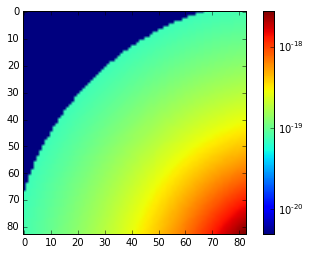

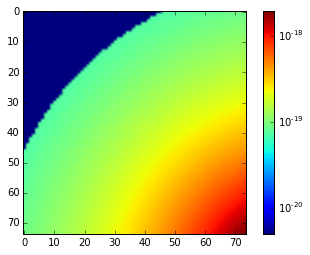

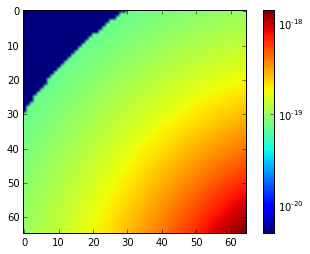

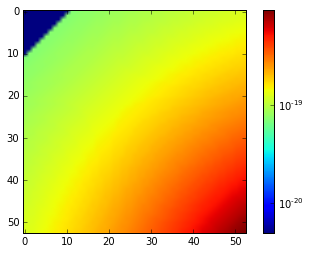

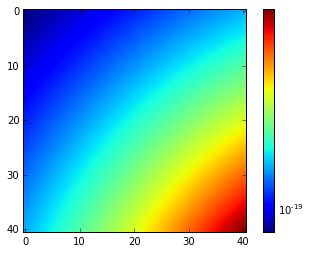

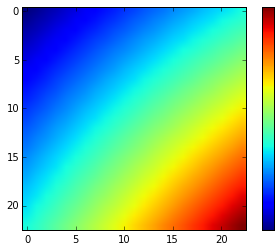

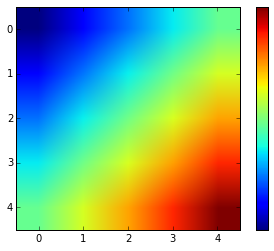

In [77]:
ratio = boxlen/dim
ctr =dim/2
dr = cell_size
num_cell_loop_over_lst2 = []
for ri in r_range:
    start = 2*int(ri/ratio)
    end  = dim/2-int(ri/ratio)
    plt.figure()
    print "(start,end):",start,end
    xyzrange = np.arange(start,end)
    print "ri : ",ri
    print "Looping over: ", len(xyzrange)**3
    num_cell_loop_over_lst2.append(len(xyzrange)**3)
#     for i in xyzrange:
#         for j in xyzrange:
#             for k in xyzrange:
#                 r = np.sqrt((i-ctr)**2+(j-ctr)**2+(k-ctr)**2)*cell_size
#                 if np.isclose(r,ri,atol=dr):#atol is +/-
#                     dens_arr[i][j][k]=1
    plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
    plt.colorbar()
    

the 2* factor was too much and nothing r = ri

if we reverse the r_range list to descending order then it goes by faster 

In [ ]:
plt.figure()
#tlst = [0,10,20,30]
#tlst =  [22,24,26,28,31]
#tlst = [22, 24, 26, 28, 30, 31]
#tlst = [0,10,20,30,40,45,50]
tlst = [30]
#tlst = [  0,  20,  40,  60,  80, 90,100,110]
for t in tlst :
	plot_MR(t)
plt.legend(loc='upper left')
plt.savefig("MRplot.png")


### Level 5 

### Level 6

(1, 10)

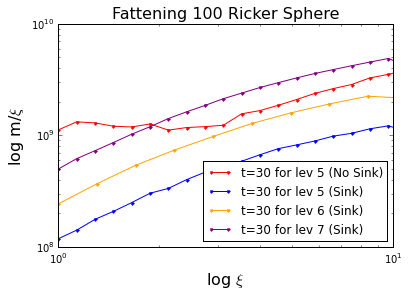

In [7]:
s = 30 
G = 6.67e-8 #cgs
c_s = 28730.5 #cm/s
tlst = [30]

c = "red"
xi_range = np.logspace(0,1.04,num=20)
data = np.loadtxt("/global/homes/d/dorislee/project/FLASH4.3_2/object/fat100/sum_args_list{}_3.txt".format(s))
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 5 (No Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")

c = "blue"
xi_range = np.logspace(0,1.04,num=20)
data = np.loadtxt("sum_args_100_correct/sum_args_list30_lev5.txt")
# xi_range = np.logspace(0,1.04,num=10)
# data = np.loadtxt("sum_args_list30_3.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 5 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")


c = "orange"
xi_range = np.logspace(0,1.04,num=10)
data = np.loadtxt("sum_args_100_correct/sum_args_list30_lev6.txt")
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 6 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")

c = "purple"
xi_range = np.logspace(0,1.04,num=20)
data =  np.array([1.71214469e+19,2.12027434e+19,2.49749866e+19,2.95401601e+19,3.51058460e+19,4.09546891e+19,4.84624911e+19,5.56862422e+19,
   6.35445417e+19, 7.30129928e+19,8.19207763e+19, 9.19974028e+19,1.01676836e+20,1.12109058e+20,1.22919094e+20,1.33161709e+20,
   1.44128679e+20,1.55421783e+20,1.67279605e+20,1.43543958e+20])
plt.loglog(xi_range,4*np.pi*G*data/c_s,label= "t={} for lev 7 (Sink)".format(s), color=c,marker= '.')
plt.legend(loc ="lower right")


plt.xlabel(r"log $\xi$",fontsize=16)
plt.ylabel(r"log m/$\xi$",fontsize=16)
plt.title("Fattening 100 Ricker Sphere",fontsize=16)
plt.xlim(1,10)